In [1]:
import os, json
import glob
import pandas as pd
import folderstats
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statistics

In [3]:
#access all the files
df = folderstats.folderstats('C:/temp/RA/DataPreProcessing/ZKOne/KVDRRK2_YSMVA7J9Z_2020.10.12_2020.11.08/sleep_report', ignore_hidden=True)
df.head()

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
0,2,C:/temp/RA/DataPreProcessing/ZKOne/KVDRRK2_YSM...,data_reports,py,8555,2020-12-03 10:52:20,2020-11-26 14:53:53,2020-11-26 14:53:53,False,NaN,0,1,0
1,3,C:/temp/RA/DataPreProcessing/ZKOne/KVDRRK2_YSM...,data_reports2,py,269,2020-12-03 10:52:20,2020-11-25 00:19:46,2020-11-25 00:19:46,False,NaN,0,1,0
2,4,C:/temp/RA/DataPreProcessing/ZKOne/KVDRRK2_YSM...,read2,py,2847,2020-12-03 10:52:17,2020-10-20 17:17:30,2020-12-02 12:22:29,False,NaN,0,1,0
3,5,C:/temp/RA/DataPreProcessing/ZKOne/KVDRRK2_YSM...,report_20201013_K-VDRRK2,json,80,2020-12-03 10:52:18,2020-11-11 22:46:36,2020-11-24 15:36:39,False,NaN,0,1,0
4,6,C:/temp/RA/DataPreProcessing/ZKOne/KVDRRK2_YSM...,report_20201014_K-VDRRK2,json,96915,2020-12-03 10:52:18,2020-11-11 22:46:36,2020-11-24 15:36:39,False,NaN,0,1,0


In [4]:
#list the files according to the decreasing size
df_sort = df.sort_values(by='size',ascending=False)

#select only first 20 files
df_sel = df_sort.head(20)

#filename is actually file date so listing them by filename will sort the date
df_a = df_sel.sort_values(by='name')

#all the filenames
df_b = df_a.iloc[:,2] 

In [5]:
#access just the filenames - no ids
df_c = {}
for i in range(1, 20):
  df_c['df_b%d' % i] = df_b.iloc[i]

#dates: when these data have been recorded  
dates = {}
for i in range(1, 20):
  dates['df_c%d' % i] = df_c['df_b%d' % i][11:15]

total_date = [dates['df_c1'],dates['df_c2'],dates['df_c3'],dates['df_c4'],dates['df_c5'],
             dates['df_c6'],dates['df_c7'],dates['df_c8'],dates['df_c9'],dates['df_c10'],
             dates['df_c11'],dates['df_c12'],dates['df_c13'],dates['df_c14'],dates['df_c15'],
             dates['df_c16'],dates['df_c17'],dates['df_c18'],dates['df_c19']]

In [6]:
#Author ===> @Ridita Ali
#read the files
data1 = pd.read_json("report_20201014_K-VDRRK2.json")
data2 = pd.read_json("report_20201015_K-VDRRK2.json")
data3 = pd.read_json("report_20201016_K-VDRRK2.json")
data4 = pd.read_json("report_20201017_K-VDRRK2.json")
data5 = pd.read_json("report_20201021_K-VDRRK2.json")
data6 = pd.read_json("report_20201022_K-VDRRK2.json")
data7 = pd.read_json("report_20201023_K-VDRRK2.json")
data8 = pd.read_json("report_20201024_K-VDRRK2.json")
data9 = pd.read_json("report_20201025_K-VDRRK2.json")
data10 = pd.read_json("report_20201028_K-VDRRK2.json")
data11 = pd.read_json("report_20201029_K-VDRRK2.json")
data12 = pd.read_json("report_20201030_K-VDRRK2.json")
data13 = pd.read_json("report_20201031_K-VDRRK2.json")
data14 = pd.read_json("report_20201101_K-VDRRK2.json")
data15 = pd.read_json("report_20201104_K-VDRRK2.json")
data16 = pd.read_json("report_20201105_K-VDRRK2.json")
data17 = pd.read_json("report_20201106_K-VDRRK2.json")
data18 = pd.read_json("report_20201107_K-VDRRK2.json")
data19 = pd.read_json("report_20201108_K-VDRRK2.json")

In [7]:
#Author ===> @Ridita Ali
#read the features - manipulate which parameters you want to select
data_asp1 = data1.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp2 = data2.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp3 = data3.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp4 = data4.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp5 = data5.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp6 = data6.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp7 = data7.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp8 = data8.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp9 = data9.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp10 = data10.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp11 = data11.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp12 = data12.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp13 = data13.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp14 = data14.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp15 = data15.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp16 = data16.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp17 = data17.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp18 = data18.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]
data_asp19 = data19.loc[["moniMin","AHI","REMSMin","REMSPrct","awakTims","deepSATims","lightSATims","meanHR","medHR","maxHR","minHR","meanRR","medRR","minRR","maxRR","slepATims","slepEffic","slepScore","slepMin","lightSMin","deepSMin","curvRRMin","curvHRMin","normMDens","meanNMD","movMinPrct","timesTO"],"data"]

#column_number = "0=moniMin","1=AHI","2=REMSMin","3=REMSPrct","4=awakTims","5=deepSATims","6=lightSATims","7=meanHR","8=medHR","9=maxHR","10=minHR","11=meanRR","12=medRR","13=minRR","14=maxRR","15=slepATims","16=slepEffic","17=slepScore","18=slepMin","19=lightSMin","20=deepSMin","21=curvRRMin","22=curvHRMin","23=normMDens","24=meanNMD","25=movMinPrct","26=timesTO"
#TimesTO = Turn over Freq all night, normMDens = Body movement seconds per minute, meanNMD = mean value of body motion seconds when body motion occurs

dataset = pd.concat([data_asp1,data_asp2,data_asp3,data_asp4,data_asp5,data_asp6,data_asp7,data_asp8,data_asp9,data_asp10,data_asp11,data_asp12,data_asp13,data_asp14,data_asp15,data_asp16,data_asp17,data_asp18,data_asp19], axis=1)
dataset
#data_asp1.shape

,data,data,data,data,data,data,data,data,data,data,data,data,data,data,data,data,data,data,data
moniMin,486,474,484,466,486,468,481,474,554,352,487,500,460,474,479,507,491,486,481
AHI,21.1364,20.7223,17.7828,14,24.4397,26.6038,22.2819,20.6205,27.1765,16.3291,18.7082,17.7682,11.5068,15.8621,17.2,13.4043,22.4834,17.7578,14.3304
REMSMin,66,112,71,64,91,90,105,71,85,51,76,83,87,79,86,83,114,75,79
REMSPrct,13.5802,23.6287,14.6694,13.7339,18.7243,19.2308,21.8295,14.9789,15.343,14.4886,15.6057,16.6,18.913,16.6667,17.9541,16.3708,23.2179,15.4321,16.4241
awakTims,10,8,4,5,5,9,8,7,12,6,10,9,6,8,5,9,9,9,9
deepSATims,6,1,7,0,5,5,3,8,15,0,3,4,5,2,1,2,2,0,4
lightSATims,115,86,82,78,126,120,106,95,158,64,97,95,47,76,88,76,107,95,69
meanHR,56.3275,56.3335,55.5246,53.8429,56.7863,82.6625,53.3489,56.0066,52.7859,57.9691,54.8628,52.3226,58.7299,55.3908,54.2167,50.2059,52.1602,52.5175,53.4221
medHR,56.0537,56.1714,55.172,53.8015,56.5484,82.715,53.2147,55.4143,52.3029,57.6582,53.9592,51.8471,58.1031,55.0363,53.8608,48.9387,51.383,51.791,52.7186
maxHR,62.7146,64.6892,63.7155,65.1105,64.1523,87.4465,62.4529,68.4925,60.2742,63.4509,65.8347,61.9375,69.0337,66.4385,62.1569,61.8463,63.129,64.231,64.525


In [65]:
#shape
print(data_asp1.shape)

(27,)


In [10]:
#Selecting only AHI: Apnea Hypopnea Index
all_AHI = [data_asp1.iloc[1],data_asp2.iloc[1],data_asp3.iloc[1],data_asp4.iloc[1],data_asp5.iloc[1],
           data_asp6.iloc[1],data_asp7.iloc[1],data_asp8.iloc[1],data_asp9.iloc[1],data_asp10.iloc[1],
           data_asp11.iloc[1],data_asp12.iloc[1],data_asp13.iloc[1],data_asp14.iloc[1],data_asp15.iloc[1],
           data_asp16.iloc[1],data_asp17.iloc[1],data_asp18.iloc[1],data_asp19.iloc[1]]
print("Daily AHI is :",all_AHI)

MeanAHI = statistics.mean(all_AHI)
print("Mean of AHI is :", MeanAHI)

Daily AHI is : [21.136363983154297, 20.722347259521484, 17.782804489135742, 14, 24.439655303955078, 26.60377311706543, 22.281879425048828, 20.620525360107422, 27.176469802856445, 16.329113006591797, 18.708240509033203, 17.768239974975586, 11.50684928894043, 15.862069129943848, 17.200000762939453, 13.404254913330078, 22.483369827270508, 17.75784683227539, 14.330357551574707]
Mean of AHI is : 18.953376870406302


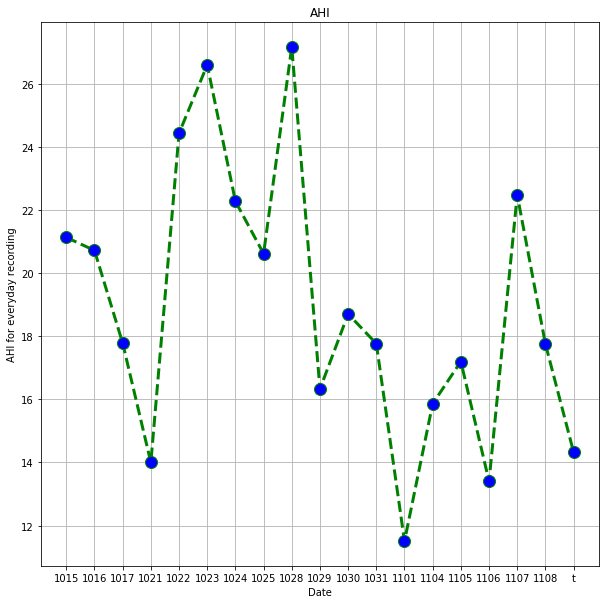

In [9]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.grid()
ax.set_title("AHI")
ax.set_ylabel("AHI for everyday recording")
ax.set_xlabel("Date")
plt.plot(total_date, all_AHI, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.show()

In [12]:
#Selecting only Rapid Eye Movements (total REM time)
all_REM = [data_asp1.iloc[2],data_asp2.iloc[2],data_asp3.iloc[2],data_asp4.iloc[2],data_asp5.iloc[2],
           data_asp6.iloc[2],data_asp7.iloc[2],data_asp8.iloc[2],data_asp9.iloc[2],data_asp10.iloc[2],
           data_asp11.iloc[2],data_asp12.iloc[2],data_asp13.iloc[2],data_asp14.iloc[2],data_asp15.iloc[2],
           data_asp16.iloc[2],data_asp17.iloc[2],data_asp18.iloc[2],data_asp19.iloc[2]]

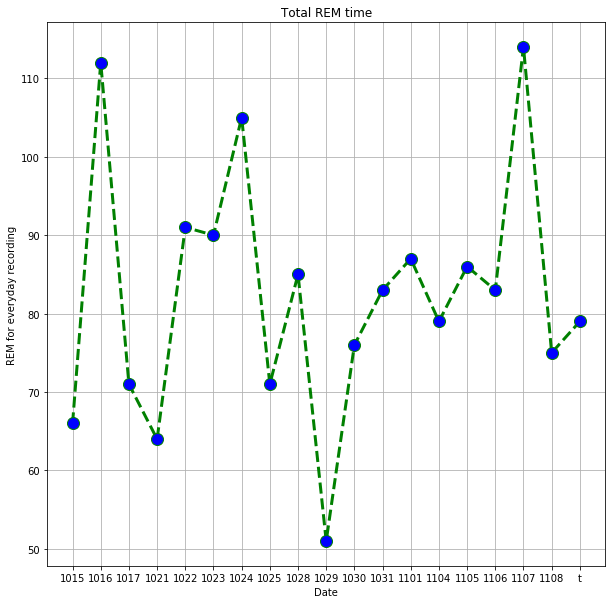

In [13]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.grid()
ax.set_title("Total REM time")
ax.set_ylabel("REM for everyday recording")
ax.set_xlabel("Date")
plt.plot(total_date, all_REM, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.show()

In [14]:
#Selecting only Rapid Eye Movements Percent (REM percentage= Total REM time / Monitoring duration)
REMpercent = [data_asp1.iloc[3],data_asp2.iloc[3],data_asp3.iloc[3],data_asp4.iloc[3],data_asp5.iloc[3],
           data_asp6.iloc[3],data_asp7.iloc[3],data_asp8.iloc[3],data_asp9.iloc[3],data_asp10.iloc[3],
           data_asp11.iloc[3],data_asp12.iloc[3],data_asp13.iloc[3],data_asp14.iloc[3],data_asp15.iloc[3],
           data_asp16.iloc[3],data_asp17.iloc[3],data_asp18.iloc[3],data_asp19.iloc[3]]

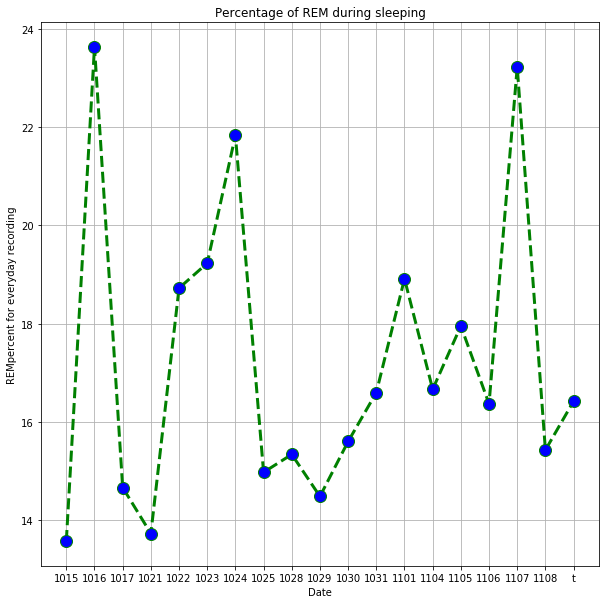

In [15]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.grid()
ax.set_title("Percentage of REM during sleeping")
ax.set_ylabel("REMpercent for everyday recording")
ax.set_xlabel("Date")
plt.plot(total_date, REMpercent, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.show()

In [16]:
#Selecting only Mean Heart Rate
all_mHR = [data_asp1.iloc[7],data_asp2.iloc[7],data_asp3.iloc[7],data_asp4.iloc[7],data_asp5.iloc[7],
           data_asp6.iloc[7],data_asp7.iloc[7],data_asp8.iloc[7],data_asp9.iloc[7],data_asp10.iloc[7],
           data_asp11.iloc[7],data_asp12.iloc[7],data_asp13.iloc[7],data_asp14.iloc[7],data_asp15.iloc[7],
           data_asp16.iloc[7],data_asp17.iloc[7],data_asp18.iloc[7],data_asp19.iloc[7]]

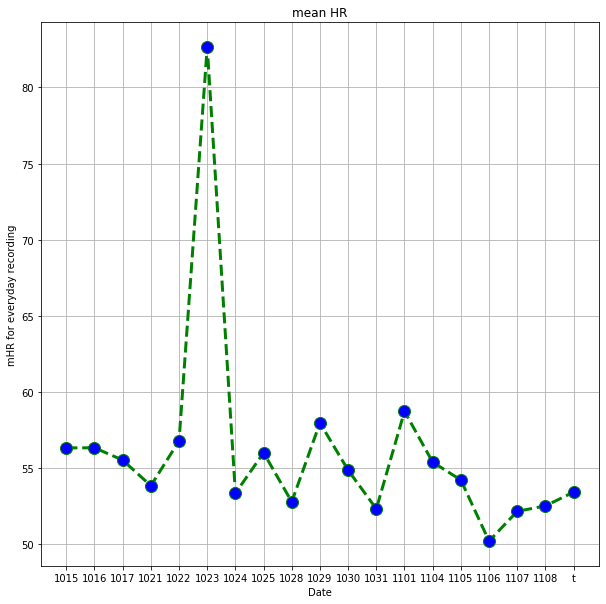

In [17]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.grid()
ax.set_title("mean HR")
ax.set_ylabel("mHR for everyday recording")
ax.set_xlabel("Date")
plt.plot(total_date, all_mHR, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.show()

In [18]:
#Selecting only Mean Respiration Rate
all_mRR = [data_asp1.iloc[11],data_asp2.iloc[11],data_asp3.iloc[11],data_asp4.iloc[11],data_asp5.iloc[11],
           data_asp6.iloc[11],data_asp7.iloc[11],data_asp8.iloc[11],data_asp9.iloc[11],data_asp10.iloc[11],
           data_asp11.iloc[11],data_asp12.iloc[11],data_asp13.iloc[11],data_asp14.iloc[11],data_asp15.iloc[11],
           data_asp16.iloc[11],data_asp17.iloc[11],data_asp18.iloc[11],data_asp19.iloc[11]]

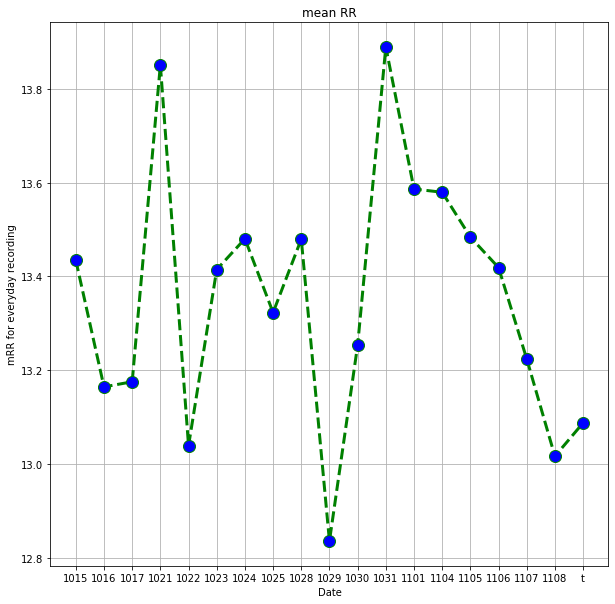

In [19]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.grid()
ax.set_title("mean RR")
ax.set_ylabel("mRR for everyday recording")
ax.set_xlabel("Date")
plt.plot(total_date, all_mRR, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.show()

In [20]:
#Selecting only Sleep Efficiency
all_SleepEff = [data_asp1.iloc[17],data_asp2.iloc[17],data_asp3.iloc[17],data_asp4.iloc[17],data_asp5.iloc[17],
           data_asp6.iloc[17],data_asp7.iloc[17],data_asp8.iloc[17],data_asp9.iloc[17],data_asp10.iloc[17],
           data_asp11.iloc[17],data_asp12.iloc[17],data_asp13.iloc[17],data_asp14.iloc[17],data_asp15.iloc[17],
           data_asp16.iloc[17],data_asp17.iloc[17],data_asp18.iloc[17],data_asp19.iloc[17]]

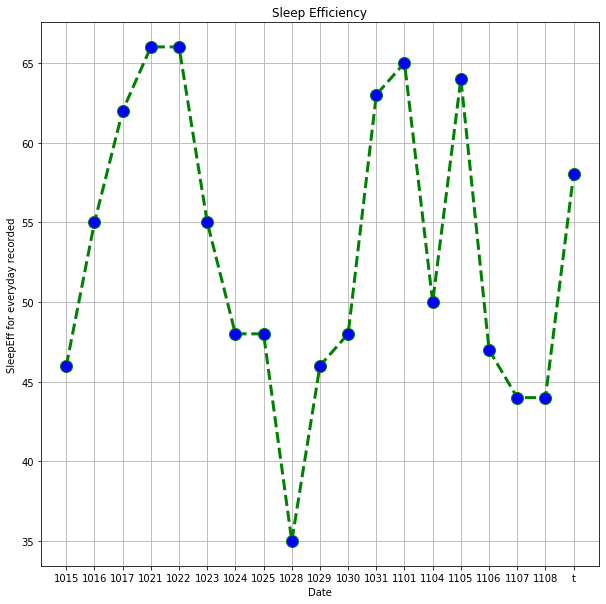

In [21]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.grid()
ax.set_title("Sleep Efficiency")
ax.set_ylabel("SleepEff for everyday recorded")
ax.set_xlabel("Date")
plt.plot(total_date, all_SleepEff, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.show()

In [22]:
all_AHI = [data_asp1.iloc[1],data_asp2.iloc[1],data_asp3.iloc[1],data_asp4.iloc[1],data_asp5.iloc[1],
           data_asp6.iloc[1],data_asp7.iloc[1],data_asp8.iloc[1],data_asp9.iloc[1],data_asp10.iloc[1],
           data_asp11.iloc[1],data_asp12.iloc[1],data_asp13.iloc[1],data_asp14.iloc[1],data_asp15.iloc[1],
           data_asp16.iloc[1],data_asp17.iloc[1],data_asp18.iloc[1],data_asp19.iloc[1]]
AHIDeepSleep = [data_asp1.iloc[5],data_asp2.iloc[5],data_asp3.iloc[5],data_asp4.iloc[5],data_asp5.iloc[5],
           data_asp6.iloc[5],data_asp7.iloc[5],data_asp8.iloc[5],data_asp9.iloc[5],data_asp10.iloc[5],
           data_asp11.iloc[5],data_asp12.iloc[5],data_asp13.iloc[5],data_asp14.iloc[5],data_asp15.iloc[5],
           data_asp16.iloc[5],data_asp17.iloc[5],data_asp18.iloc[5],data_asp19.iloc[5]]
AHILightSleep = [data_asp1.iloc[6],data_asp2.iloc[6],data_asp3.iloc[6],data_asp4.iloc[6],data_asp5.iloc[6],
           data_asp6.iloc[6],data_asp7.iloc[6],data_asp8.iloc[6],data_asp9.iloc[6],data_asp10.iloc[6],
           data_asp11.iloc[6],data_asp12.iloc[6],data_asp13.iloc[6],data_asp14.iloc[6],data_asp15.iloc[6],
           data_asp16.iloc[6],data_asp17.iloc[6],data_asp18.iloc[6],data_asp19.iloc[6]]

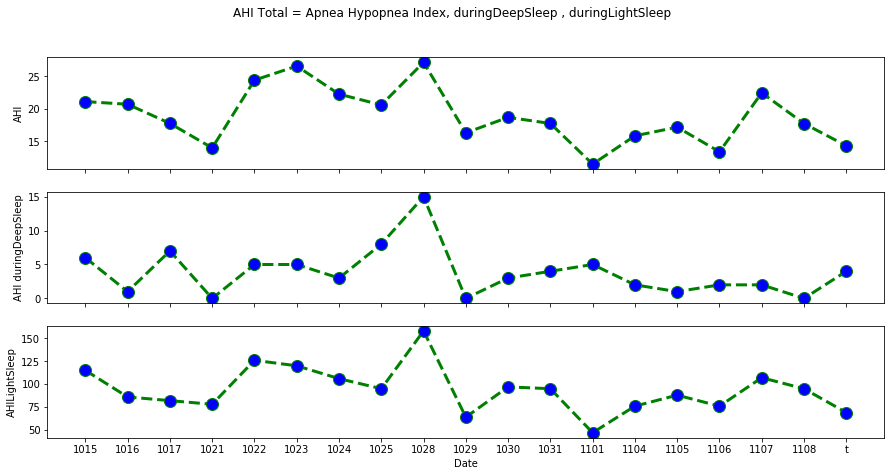

In [23]:
# Plots

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15, 7)) # figsize = 15:vertical 7:horizontal
fig.suptitle('AHI Total = Apnea Hypopnea Index, duringDeepSleep , duringLightSleep')
x = total_date
y1 = all_AHI
y2 = AHIDeepSleep
y3 = AHILightSleep
ax1.plot(x, y1, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
ax2.plot(x, y2, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
ax3.plot(x, y3, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
ax1.set_ylabel("AHI")
ax2.set_ylabel("AHI duringDeepSleep")
ax3.set_ylabel("AHILightSleep")
ax3.set_xlabel("Date")

plt.show()

In [24]:
SleepMonitoring = [data_asp1.iloc[0],data_asp2.iloc[0],data_asp3.iloc[0],data_asp4.iloc[0],data_asp5.iloc[0],
           data_asp6.iloc[0],data_asp7.iloc[0],data_asp8.iloc[0],data_asp9.iloc[0],data_asp10.iloc[5],
           data_asp11.iloc[0],data_asp12.iloc[0],data_asp13.iloc[0],data_asp14.iloc[0],data_asp15.iloc[5],
           data_asp16.iloc[0],data_asp17.iloc[0],data_asp18.iloc[0],data_asp19.iloc[0]]
SleepDuration = [data_asp1.iloc[19],data_asp2.iloc[19],data_asp3.iloc[19],data_asp4.iloc[19],data_asp5.iloc[19],
           data_asp6.iloc[19],data_asp7.iloc[19],data_asp8.iloc[19],data_asp9.iloc[19],data_asp10.iloc[19],
           data_asp11.iloc[19],data_asp12.iloc[19],data_asp13.iloc[19],data_asp14.iloc[19],data_asp15.iloc[19],
           data_asp16.iloc[19],data_asp17.iloc[19],data_asp18.iloc[19],data_asp19.iloc[19]]
REMTime = [data_asp1.iloc[2],data_asp2.iloc[2],data_asp3.iloc[2],data_asp4.iloc[2],data_asp5.iloc[2],
           data_asp6.iloc[2],data_asp7.iloc[2],data_asp8.iloc[2],data_asp9.iloc[2],data_asp10.iloc[2],
           data_asp11.iloc[2],data_asp12.iloc[2],data_asp13.iloc[2],data_asp14.iloc[2],data_asp15.iloc[2],
           data_asp16.iloc[2],data_asp17.iloc[2],data_asp18.iloc[2],data_asp19.iloc[2]]
print(SleepMonitoring)
print(SleepDuration)
print(REMTime)

MeanSleepMonitoring = statistics.mean(SleepMonitoring)
MeanSleepDuration = statistics.mean(SleepDuration)
MeanREMTime = statistics.mean(REMTime)

print("Mean of SleepMonitoring is :", MeanSleepMonitoring)
print("Mean of SleepDurationis :", MeanSleepDuration)
print("Mean of REMTime is :", MeanREMTime)

[486, 474, 484, 466, 486, 468, 481, 474, 554, 0, 487, 500, 460, 474, 1, 507, 491, 486, 481]
[305, 251, 295, 300, 282, 267, 301, 269, 339, 217, 334, 272, 299, 300, 282, 346, 300, 285, 269]
[66, 112, 71, 64, 91, 90, 105, 71, 85, 51, 76, 83, 87, 79, 86, 83, 114, 75, 79]
Mean of SleepMonitoring is : 434.7368421052632
Mean of SleepDurationis : 290.1578947368421
Mean of REMTime is : 82.52631578947368


#Plots for MonitoringDuration: Total minutes of sleep monitoring
#SleepDuration: The minutes means the duration from the moment you fall asleep to the moment you wake up.

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15, 7)) # figsize = 15:vertical 7:horizontal
fig.suptitle('Sleep Monitoring Duration and Sleep Duration')
x = total_date
y1 = moniMin
y2 = SlepMin

ax1.plot(x, y1, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
ax2.plot(x, y2, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
ax1.set_ylabel("SleepMonitoringTime")
ax2.set_ylabel("SleepDuration")
ax3.set_xlabel("Date")

plt.show()

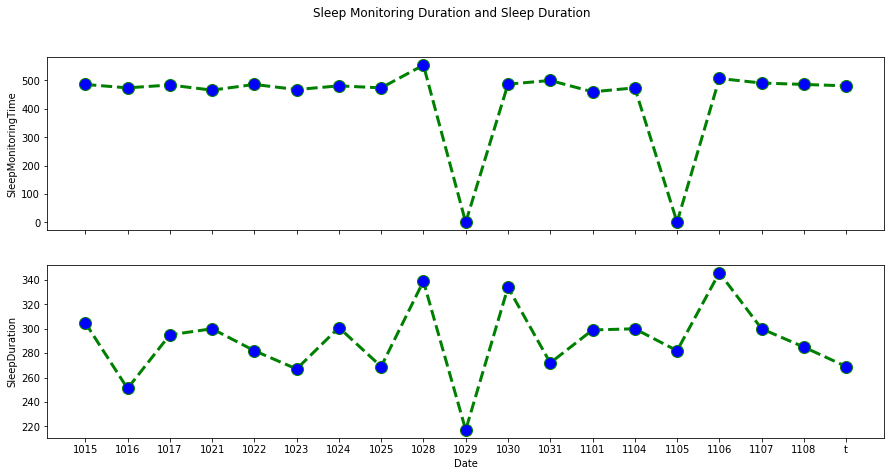

In [25]:
#Plots for MonitoringDuration: Total minutes of sleep monitoring #SleepDuration: The minutes means the duration from the moment you fall asleep to the moment you wake up.

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15, 7)) # figsize = 15:vertical 7:horizontal

fig.suptitle('Sleep Monitoring Duration and Sleep Duration')
x = total_date
y1 = SleepMonitoring
y2 = SleepDuration

ax1.plot(x, y1, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
ax2.plot(x, y2, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
ax1.set_ylabel("SleepMonitoringTime")
ax2.set_ylabel("SleepDuration")
ax2.set_xlabel("Date")

plt.show()


In [26]:
LightSleepTimes = [data_asp1.iloc[20],data_asp2.iloc[20],data_asp3.iloc[20],data_asp4.iloc[20],data_asp5.iloc[20],
           data_asp6.iloc[20],data_asp7.iloc[20],data_asp8.iloc[20],data_asp9.iloc[20],data_asp10.iloc[20],
           data_asp11.iloc[20],data_asp12.iloc[20],data_asp13.iloc[20],data_asp14.iloc[20],data_asp15.iloc[20],
           data_asp16.iloc[20],data_asp17.iloc[20],data_asp18.iloc[20],data_asp19.iloc[20]]
DeepSleepTimes = [data_asp1.iloc[6],data_asp2.iloc[6],data_asp3.iloc[6],data_asp4.iloc[6],data_asp5.iloc[6],
           data_asp6.iloc[6],data_asp7.iloc[6],data_asp8.iloc[6],data_asp9.iloc[6],data_asp10.iloc[6],
           data_asp11.iloc[6],data_asp12.iloc[6],data_asp13.iloc[6],data_asp14.iloc[6],data_asp15.iloc[6],
           data_asp16.iloc[6],data_asp17.iloc[6],data_asp18.iloc[6],data_asp19.iloc[6]]
SleepDuration = [data_asp1.iloc[19],data_asp2.iloc[19],data_asp3.iloc[19],data_asp4.iloc[19],data_asp5.iloc[19],
           data_asp6.iloc[19],data_asp7.iloc[19],data_asp8.iloc[19],data_asp9.iloc[19],data_asp10.iloc[19],
           data_asp11.iloc[19],data_asp12.iloc[19],data_asp13.iloc[19],data_asp14.iloc[19],data_asp15.iloc[19],
           data_asp16.iloc[19],data_asp17.iloc[19],data_asp18.iloc[19],data_asp19.iloc[19]]
REMTime = [data_asp1.iloc[2],data_asp2.iloc[2],data_asp3.iloc[2],data_asp4.iloc[2],data_asp5.iloc[2],
           data_asp6.iloc[2],data_asp7.iloc[2],data_asp8.iloc[2],data_asp9.iloc[2],data_asp10.iloc[2],
           data_asp11.iloc[2],data_asp12.iloc[2],data_asp13.iloc[2],data_asp14.iloc[2],data_asp15.iloc[2],
           data_asp16.iloc[2],data_asp17.iloc[2],data_asp18.iloc[2],data_asp19.iloc[2]]
SleepMonitoring = [data_asp1.iloc[0],data_asp2.iloc[0],data_asp3.iloc[0],data_asp4.iloc[0],data_asp5.iloc[0],
           data_asp6.iloc[0],data_asp7.iloc[0],data_asp8.iloc[0],data_asp9.iloc[0],data_asp10.iloc[0],
           data_asp11.iloc[0],data_asp12.iloc[0],data_asp13.iloc[0],data_asp14.iloc[0],data_asp15.iloc[0],
           data_asp16.iloc[0],data_asp17.iloc[0],data_asp18.iloc[0],data_asp19.iloc[0]]
WakeUpDuration = [data_asp1.iloc[4],data_asp2.iloc[4],data_asp3.iloc[4],data_asp4.iloc[4],data_asp5.iloc[4],
           data_asp6.iloc[4],data_asp7.iloc[4],data_asp8.iloc[4],data_asp9.iloc[4],data_asp10.iloc[4],
           data_asp11.iloc[4],data_asp12.iloc[4],data_asp13.iloc[4],data_asp14.iloc[4],data_asp15.iloc[4],
           data_asp16.iloc[4],data_asp17.iloc[4],data_asp18.iloc[4],data_asp19.iloc[4]]

print(REMTime)
print(LightSleepTimes)
print(DeepSleepTimes)
print(SleepMonitoring)
print(SleepDuration)
print(WakeUpDuration)

[66, 112, 71, 64, 91, 90, 105, 71, 85, 51, 76, 83, 87, 79, 86, 83, 114, 75, 79]
[69, 80, 76, 86, 91, 67, 41, 79, 86, 48, 39, 111, 52, 56, 82, 41, 37, 86, 100]
[115, 86, 82, 78, 126, 120, 106, 95, 158, 64, 97, 95, 47, 76, 88, 76, 107, 95, 69]
[486, 474, 484, 466, 486, 468, 481, 474, 554, 352, 487, 500, 460, 474, 479, 507, 491, 486, 481]
[305, 251, 295, 300, 282, 267, 301, 269, 339, 217, 334, 272, 299, 300, 282, 346, 300, 285, 269]
[10, 8, 4, 5, 5, 9, 8, 7, 12, 6, 10, 9, 6, 8, 5, 9, 9, 9, 9]


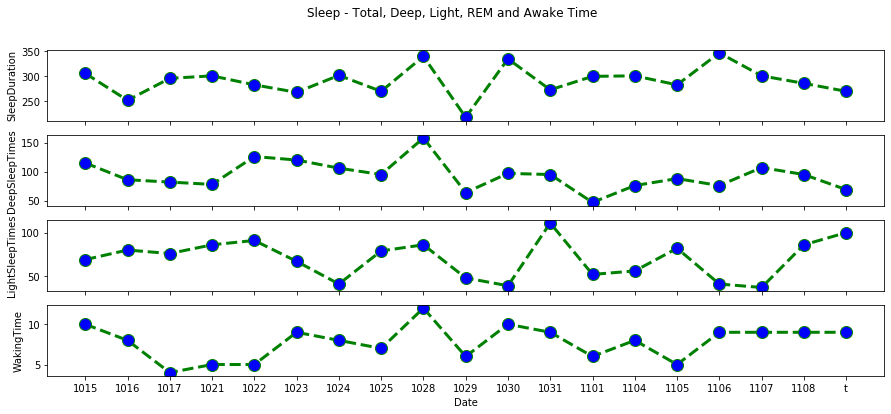

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15, 6)) # figsize = 15:vertical 6:horizontal

fig.suptitle('Sleep - Total, Deep, Light, REM and Awake Time')
x = total_date
y1 = SleepDuration
y2 = DeepSleepTimes
y3 = LightSleepTimes
y4 = WakeUpDuration

ax1.plot(x, y1, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
ax2.plot(x, y2, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
ax3.plot(x, y3, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
ax4.plot(x, y4, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
ax1.set_ylabel("SleepDuration")
ax2.set_ylabel("DeepSleepTimes")
ax3.set_ylabel("LightSleepTimes")
ax4.set_ylabel("WakingTime")
ax4.set_xlabel("Date")

plt.show()

In [28]:
MeanNMD = [data_asp1.iloc[24],data_asp2.iloc[24],data_asp3.iloc[24],data_asp4.iloc[24],data_asp5.iloc[24],
           data_asp6.iloc[24],data_asp7.iloc[24],data_asp8.iloc[24],data_asp9.iloc[24],data_asp10.iloc[24],
           data_asp11.iloc[24],data_asp12.iloc[24],data_asp13.iloc[24],data_asp14.iloc[24],data_asp15.iloc[24],
           data_asp16.iloc[24],data_asp17.iloc[24],data_asp18.iloc[24],data_asp19.iloc[24]]

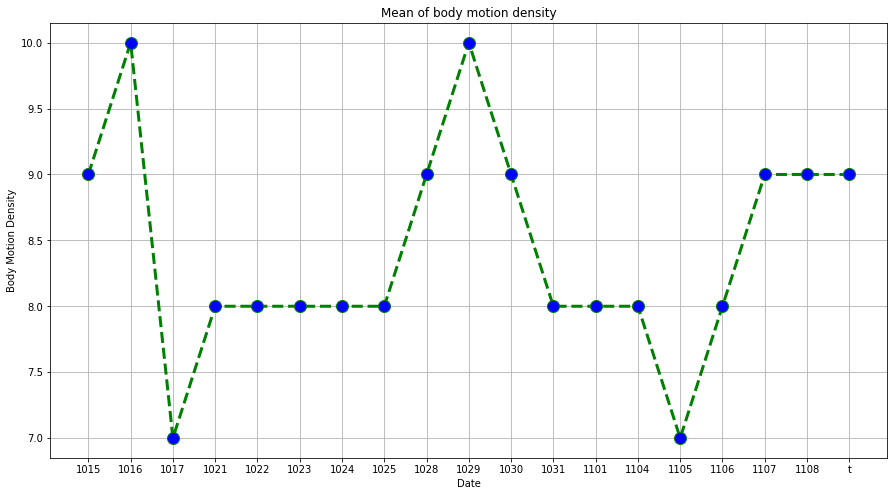

In [32]:
f, ax = plt.subplots(1, 1, figsize = (15, 8))
ax.grid()
ax.set_title("Mean of body motion density")
ax.set_ylabel("Body Motion Density")
ax.set_xlabel("Date")
plt.plot(total_date, MeanNMD, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.show()

In [36]:
Freq_TurnOver_all_night = [data_asp1.iloc[26],data_asp2.iloc[26],data_asp3.iloc[26],data_asp4.iloc[26],data_asp5.iloc[26],
           data_asp6.iloc[26],data_asp7.iloc[26],data_asp8.iloc[26],data_asp9.iloc[26],data_asp10.iloc[26],
           data_asp11.iloc[26],data_asp12.iloc[26],data_asp13.iloc[26],data_asp14.iloc[26],data_asp15.iloc[26],
           data_asp16.iloc[26],data_asp17.iloc[26],data_asp18.iloc[26],data_asp19.iloc[26]]

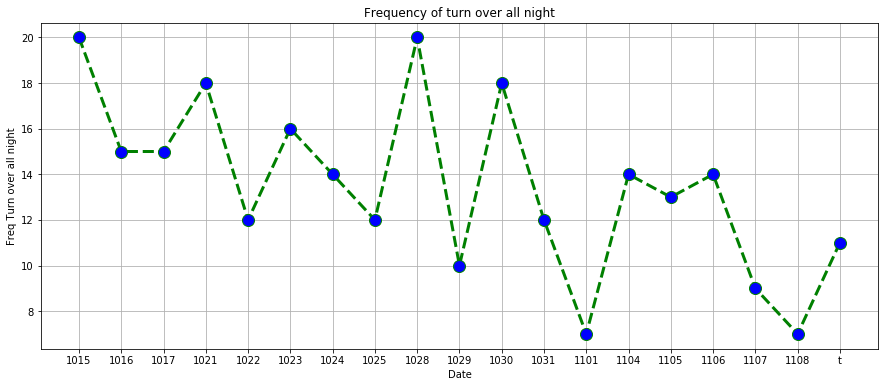

In [35]:
f, ax = plt.subplots(1, 1, figsize = (15, 6))
ax.grid()
ax.set_title("Frequency of turn over all night")
ax.set_ylabel("Freq Turn over all night")
ax.set_xlabel("Date")
plt.plot(total_date, Freq_TurnOver_all_night, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.show()